In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filenames = ['Dialogues/clean_ross_list.txt','Dialogues/clean_rachel_list.txt',
             'Dialogues/clean_chandler_list.txt','Dialogues/clean_joey_list.txt',
             'Dialogues/clean_monica_list.txt','Dialogues/clean_phoebe_list.txt']

In [4]:
f = open('Dialogues/clean_ross_list.txt','r',encoding='utf-8')
ross_lines = f.readlines() 
f.close()

f = open('Dialogues/clean_rachel_list.txt','r',encoding='utf-8')
rachel_lines = f.readlines() 
f.close()

f = open('Dialogues/clean_chandler_list.txt','r',encoding='utf-8')
chandler_lines = f.readlines() 
f.close()

f = open('Dialogues/clean_joey_list.txt','r',encoding='utf-8')
joey_lines = f.readlines() 
f.close()

f = open('Dialogues/clean_monica_list.txt','r',encoding='utf-8')
monica_lines = f.readlines() 
f.close()

f = open('Dialogues/clean_phoebe_list.txt','r',encoding='utf-8')
phoebe_lines = f.readlines() 
f.close()

In [5]:
def remove_tabs_newline(line):
    line = line.strip('\n')
    line = line.strip('\t')
    line = line.replace('\n','')
    line = line.replace('\t','')
    return line

In [6]:
i = 0
for line in ross_lines:
    changed_line = remove_tabs_newline(line)
    ross_lines[i] = changed_line
    i += 1
    
i = 0
for line in rachel_lines:
    changed_line = remove_tabs_newline(line)
    rachel_lines[i] = changed_line
    i += 1
    
i = 0
for line in chandler_lines:
    changed_line = remove_tabs_newline(line)
    chandler_lines[i] = changed_line
    i += 1
    
i = 0
for line in joey_lines:
    changed_line = remove_tabs_newline(line)
    joey_lines[i] = changed_line
    i += 1
    
i = 0
for line in monica_lines:
    changed_line = remove_tabs_newline(line)
    monica_lines[i] = changed_line
    i += 1
    
i = 0
for line in phoebe_lines:
    changed_line = remove_tabs_newline(line)
    phoebe_lines[i] = changed_line
    i += 1

In [20]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
import nltk
import re

In [13]:
stop_words = set(stopwords.words('english'))
character_list = ['ross','rachel','chandler','joey','monica','phoebe']

In [14]:
def clean_data_for_analysis(list_of_lines):
    filtered_sentence = []
    for line in list_of_lines:   
        cleanString = re.sub('\W+',' ',line)
        line = cleanString
        word_tokens = word_tokenize(str(line).lower())
        
        clean_word_tokens = []
        for w in word_tokens:
            if w not in stop_words:
                if w not in character_list:
                    clean_word_tokens.append(w)
        
        sentence = ' '.join(clean_word_tokens)
        filtered_sentence.append(sentence)
        
    return filtered_sentence

In [15]:
clean_ross_lines     = clean_data_for_analysis(ross_lines)
clean_rachel_lines   = clean_data_for_analysis(rachel_lines)
clean_chandler_lines = clean_data_for_analysis(chandler_lines)
clean_joey_lines     = clean_data_for_analysis(joey_lines)
clean_monica_lines   = clean_data_for_analysis(monica_lines)
clean_phoebe_lines   = clean_data_for_analysis(phoebe_lines)

In [16]:
def return_corpus(list_of_lines):
    corpus = []
    
    for line in list_of_lines:
        word_tokens = word_tokenize(str(line).lower())
        
        for w in word_tokens:
            corpus.append(w)
            
    return corpus

In [17]:
corpus_ross     = return_corpus(clean_ross_lines)
corpus_rachel   = return_corpus(clean_rachel_lines)
corpus_chandler = return_corpus(clean_chandler_lines)
corpus_joey     = return_corpus(clean_joey_lines)
corpus_monica   = return_corpus(clean_monica_lines)
corpus_phoebe   = return_corpus(clean_phoebe_lines)

In [18]:
corpus_ross     = [w for w in corpus_ross if len(w)>3]
corpus_rachel   = [w for w in corpus_rachel if len(w)>3]
corpus_chandler = [w for w in corpus_chandler if len(w)>3]
corpus_joey     = [w for w in corpus_joey if len(w)>3]
corpus_monica   = [w for w in corpus_monica if len(w)>3]
corpus_phoebe   = [w for w in corpus_phoebe if len(w)>3]

In [21]:
WNLemma=nltk.WordNetLemmatizer()

In [22]:
stemmed_corpus_ross     = [WNLemma.lemmatize(t) for t in corpus_ross]
stemmed_corpus_rachel   = [WNLemma.lemmatize(t) for t in corpus_rachel]
stemmed_corpus_chandler = [WNLemma.lemmatize(t) for t in corpus_chandler]
stemmed_corpus_joey     = [WNLemma.lemmatize(t) for t in corpus_joey]
stemmed_corpus_monica   = [WNLemma.lemmatize(t) for t in corpus_monica]
stemmed_corpus_phoebe   = [WNLemma.lemmatize(t) for t in corpus_phoebe]

In [23]:
string_corpus_ross = ''
for w in stemmed_corpus_ross:
    string_corpus_ross = string_corpus_ross+' '+w
    
string_corpus_rachel = ''
for w in stemmed_corpus_rachel:
    string_corpus_rachel = string_corpus_rachel+' '+w
    
string_corpus_chandler = ''
for w in stemmed_corpus_chandler:
    string_corpus_chandler = string_corpus_chandler+' '+w
    
string_corpus_joey = ''
for w in stemmed_corpus_joey:
    string_corpus_joey = string_corpus_joey+' '+w
    
string_corpus_monica = ''
for w in stemmed_corpus_monica:
    string_corpus_monica = string_corpus_monica+' '+w
    
string_corpus_phoebe = ''
for w in stemmed_corpus_phoebe:
    string_corpus_phoebe = string_corpus_phoebe+' '+w

In [24]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 import Features, EmotionOptions
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [25]:
authenticator = IAMAuthenticator('cK3w0V7bq2YMthLKkjhF0dc8mPS2oc8pbfKYneXgBAJJ')
service = NaturalLanguageUnderstandingV1(
     version='2018-03-16',
     authenticator=authenticator)
service.set_service_url('https://api.eu-gb.natural-language-understanding.watson.cloud.ibm.com/instances/20fe8890-fd31-4cc8-baf9-7e4a37718c53')

In [26]:
dict={}

In [27]:
# Ross
response = service.analyze(
            text=string_corpus_ross,
            features=Features(emotion=EmotionOptions()), language='en').get_result()
dict['Ross'] = response['emotion']['document']['emotion']

# Rachel
response = service.analyze(
            text=string_corpus_rachel,
            features=Features(emotion=EmotionOptions()), language='en').get_result()
dict['Rachel'] = response['emotion']['document']['emotion']

# Chandler
response = service.analyze(
            text=string_corpus_chandler,
            features=Features(emotion=EmotionOptions()), language='en').get_result()
dict['Chandler'] = response['emotion']['document']['emotion']

# Joey
response = service.analyze(
            text=string_corpus_joey,
            features=Features(emotion=EmotionOptions()), language='en').get_result()
dict['Joey'] = response['emotion']['document']['emotion']

# Monica
response = service.analyze(
            text=string_corpus_monica,
            features=Features(emotion=EmotionOptions()), language='en').get_result()
dict['Monica'] = response['emotion']['document']['emotion']

# Phoebe
response = service.analyze(
            text=string_corpus_phoebe,
            features=Features(emotion=EmotionOptions()), language='en').get_result()
dict['Phoebe'] = response['emotion']['document']['emotion']

In [29]:
df = pd.DataFrame(dict)
df.to_pickle('raw_emotion_scores')
df

,Ross,Rachel,Chandler,Joey,Monica,Phoebe
sadness,0.612106,0.554948,0.553073,0.560084,0.583179,0.506000
joy,0.098811,0.183773,0.150662,0.158226,0.187438,0.195674
fear,0.269642,0.226147,0.212061,0.200049,0.169092,0.344889
disgust,0.097966,0.059266,0.120115,0.122802,0.125780,0.078036
anger,0.246089,0.268363,0.282365,0.272629,0.228915,0.177742


In [248]:
emotion_labels = ['Sadness','Joy','Fear','Disgust','Anger']
character_list = ['Ross','Rachel','Chandler','Joey','Monica','Phoebe']
colors = ['#A2C865','h#E5C949','#52ACC9','#EA96A3','#E39361']

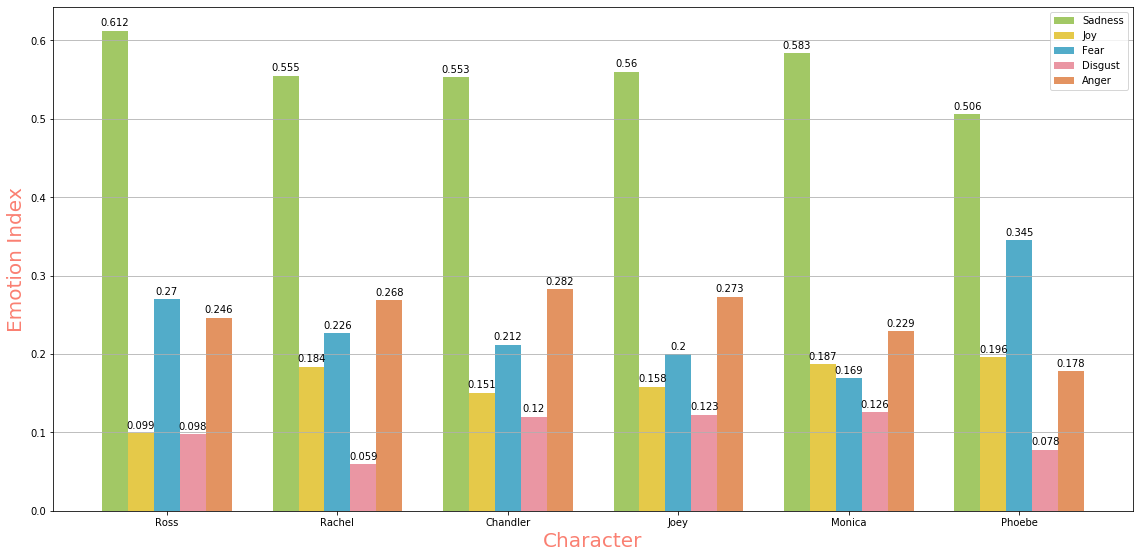

In [251]:
fig = plt.figure(figsize=(15,7))

sadness_val = list(df.loc['sadness'])
joy_val     = list(df.loc['joy'])
fear_val    = list(df.loc['fear'])
disgust_val = list(df.loc['disgust'])
anger_val   = list(df.loc['anger'])

ax = fig.add_axes([0,0,1,1])

X = np.arange(6)
w = 0.152

data = [sadness_val,joy_val,fear_val,disgust_val,anger_val]

rect1 = ax.bar(X - 2*w, data[0], color = colors[0], width = w, label = emotion_labels[0])
rect2 = ax.bar(X - w,   data[1], color = colors[1], width = w, label = emotion_labels[1])
rect3 = ax.bar(X,       data[2], color = colors[2], width = w, label = emotion_labels[2])
rect4 = ax.bar(X + w,   data[3], color = colors[3], width = w, label = emotion_labels[3])
rect5 = ax.bar(X + 2*w, data[4], color = colors[4], width = w, label = emotion_labels[4])

def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(), 3)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height+0.01),
                    ha='center', va='center')

ax.yaxis.grid()
plt.xticks(X, character_list)
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
autolabel(rect5)

ax.set_xlabel('Character', fontsize=20, color='salmon')
ax.set_ylabel('Emotion Index', fontsize=20, color='salmon')

plt.savefig('emotion_index_summary.png', bbox_inches = 'tight')

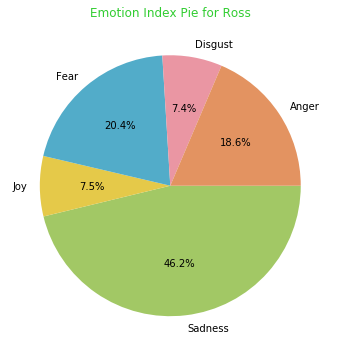

In [285]:
fig = plt.figure(figsize=(6,6))

# Ross
plt.pie(df.Ross, colors=colors, labels=emotion_labels,
autopct='%1.1f%%',
counterclock=False)

plt.title('Emotion Index Pie for Ross',color='limegreen')
plt.savefig('ross_emotion_pie.png', bbox_inches = 'tight')

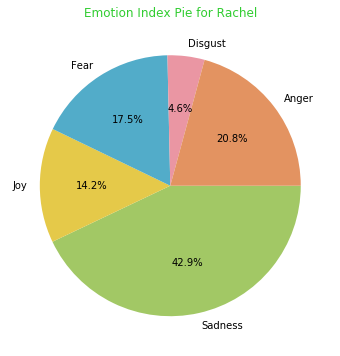

In [286]:
fig = plt.figure(figsize=(6,6))

# Rachel
plt.pie(df.Rachel, colors=colors, labels=emotion_labels,
autopct='%1.1f%%',
counterclock=False)

plt.title('Emotion Index Pie for Rachel',color='limegreen')
plt.savefig('rachel_emotion_pie.png', bbox_inches = 'tight')

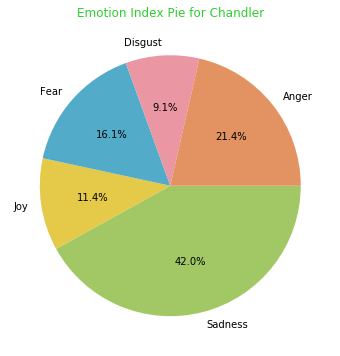

In [287]:
fig = plt.figure(figsize=(6,6))

# Chandler
plt.pie(df.Chandler, colors=colors, labels=emotion_labels,
autopct='%1.1f%%',
counterclock=False)

plt.title('Emotion Index Pie for Chandler',color='limegreen')
plt.savefig('chandler_emotion_pie.png', bbox_inches = 'tight')

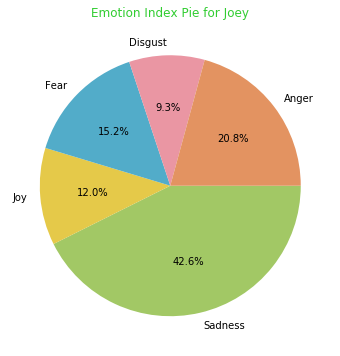

In [288]:
fig = plt.figure(figsize=(6,6))

# Joey
plt.pie(df.Joey, colors=colors, labels=emotion_labels,
autopct='%1.1f%%',
counterclock=False)

plt.title('Emotion Index Pie for Joey',color='limegreen')
plt.savefig('joey_emotion_pie.png', bbox_inches = 'tight')

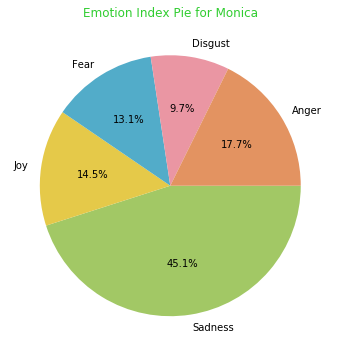

In [289]:
fig = plt.figure(figsize=(6,6))

# Monica
plt.pie(df.Monica, colors=colors, labels=emotion_labels,
autopct='%1.1f%%',
counterclock=False)

plt.title('Emotion Index Pie for Monica',color='limegreen')
plt.savefig('monica_emotion_pie.png', bbox_inches = 'tight')

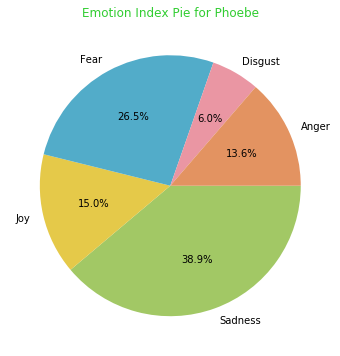

In [290]:
fig = plt.figure(figsize=(6,6))

# Phoebe
plt.pie(df.Phoebe, colors=colors, labels=emotion_labels,
autopct='%1.1f%%',
counterclock=False)

plt.title('Emotion Index Pie for Phoebe',color='limegreen')
plt.savefig('phoebe_emotion_pie.png', bbox_inches = 'tight')

In [299]:
emotion_labels = ['Sadness','Joy','Fear','Disgust','Anger']
new_colors = ['#A2C865','#E5C949','#52ACC9','#EA96A3','#E39361','#B38888']

# sadness quotient

sadness_quotient_Ross     = df.Ross.sadness/df['Ross'].sum()
sadness_quotient_Rachel   = df.Rachel.sadness/df['Rachel'].sum()
sadness_quotient_Chandler = df.Chandler.sadness/df['Chandler'].sum()
sadness_quotient_Joey     = df.Joey.sadness/df['Joey'].sum()
sadness_quotient_Monica   = df.Monica.sadness/df['Monica'].sum()
sadness_quotient_Phoebe   = df.Phoebe.sadness/df['Phoebe'].sum()

# joy quotient

joy_quotient_Ross     = df.Ross.joy/df['Ross'].sum()
joy_quotient_Rachel   = df.Rachel.joy/df['Rachel'].sum()
joy_quotient_Chandler = df.Chandler.joy/df['Chandler'].sum()
joy_quotient_Joey     = df.Joey.joy/df['Joey'].sum()
joy_quotient_Monica   = df.Monica.joy/df['Monica'].sum()
joy_quotient_Phoebe   = df.Phoebe.joy/df['Phoebe'].sum()

# fear quotient

fear_quotient_Ross     = df.Ross.fear/df['Ross'].sum()
fear_quotient_Rachel   = df.Rachel.fear/df['Rachel'].sum()
fear_quotient_Chandler = df.Chandler.fear/df['Chandler'].sum()
fear_quotient_Joey     = df.Joey.fear/df['Joey'].sum()
fear_quotient_Monica   = df.Monica.fear/df['Monica'].sum()
fear_quotient_Phoebe   = df.Phoebe.fear/df['Phoebe'].sum()

# disgust quotient

disgust_quotient_Ross     = df.Ross.disgust/df['Ross'].sum()
disgust_quotient_Rachel   = df.Rachel.disgust/df['Rachel'].sum()
disgust_quotient_Chandler = df.Chandler.disgust/df['Chandler'].sum()
disgust_quotient_Joey     = df.Joey.disgust/df['Joey'].sum()
disgust_quotient_Monica   = df.Monica.disgust/df['Monica'].sum()
disgust_quotient_Phoebe   = df.Phoebe.disgust/df['Phoebe'].sum()

# anger quotient

anger_quotient_Ross     = df.Ross.anger/df['Ross'].sum()
anger_quotient_Rachel   = df.Rachel.anger/df['Rachel'].sum()
anger_quotient_Chandler = df.Chandler.anger/df['Chandler'].sum()
anger_quotient_Joey     = df.Joey.anger/df['Joey'].sum()
anger_quotient_Monica   = df.Monica.anger/df['Monica'].sum()
anger_quotient_Phoebe   = df.Phoebe.anger/df['Phoebe'].sum()

In [300]:
y_sadness = [sadness_quotient_Ross,sadness_quotient_Rachel,sadness_quotient_Chandler,
             sadness_quotient_Joey,sadness_quotient_Monica,sadness_quotient_Phoebe]

y_joy     = [joy_quotient_Ross,joy_quotient_Rachel,joy_quotient_Chandler,
             joy_quotient_Joey,joy_quotient_Monica,joy_quotient_Phoebe]

y_fear    = [fear_quotient_Ross,fear_quotient_Rachel,fear_quotient_Chandler,
            fear_quotient_Joey,fear_quotient_Monica,fear_quotient_Phoebe]

y_disgust = [disgust_quotient_Ross,disgust_quotient_Rachel,disgust_quotient_Chandler,
             disgust_quotient_Joey,disgust_quotient_Monica,disgust_quotient_Phoebe]

y_anger   = [anger_quotient_Ross,anger_quotient_Rachel,anger_quotient_Chandler,
             anger_quotient_Joey,anger_quotient_Monica,anger_quotient_Phoebe]

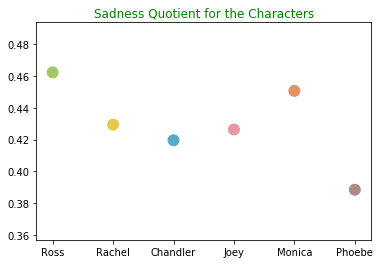

In [331]:
# Sadness Quotient

plt.scatter(character_list,y_sadness,s=120, c=new_colors)
plt.title('Sadness Quotient for the Characters',color='green')

plt.savefig('sadness_quotient_all.png', bbox_inches = 'tight')

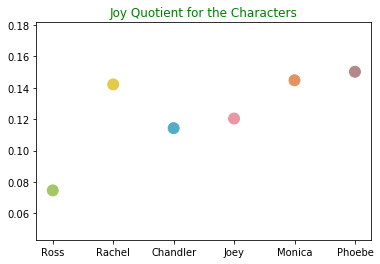

In [332]:
# Joy Quotient

plt.scatter(character_list,y_joy,s=120, c=new_colors)
plt.title('Joy Quotient for the Characters',color='green')

plt.savefig('joy_quotient_all.png', bbox_inches = 'tight')

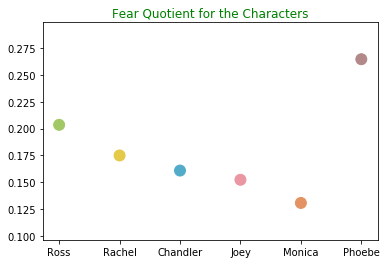

In [333]:
# Fear Quotient

plt.scatter(character_list,y_fear,s=120, c=new_colors)
plt.title('Fear Quotient for the Characters',color='green')

plt.savefig('fear_quotient_all.png', bbox_inches = 'tight')

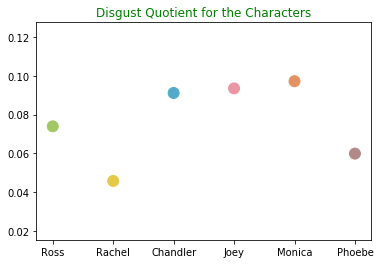

In [334]:
# Disgust Quotient

plt.scatter(character_list,y_disgust,s=120, c=new_colors)
plt.title('Disgust Quotient for the Characters',color='green')

plt.savefig('disgust_quotient_all.png', bbox_inches = 'tight')

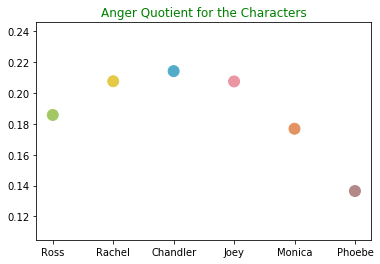

In [335]:
# Anger Quotient

plt.scatter(character_list,y_anger,s=120, c=new_colors)
plt.title('Anger Quotient for the Characters',color='green')

plt.savefig('anger_quotient_all.png', bbox_inches = 'tight')

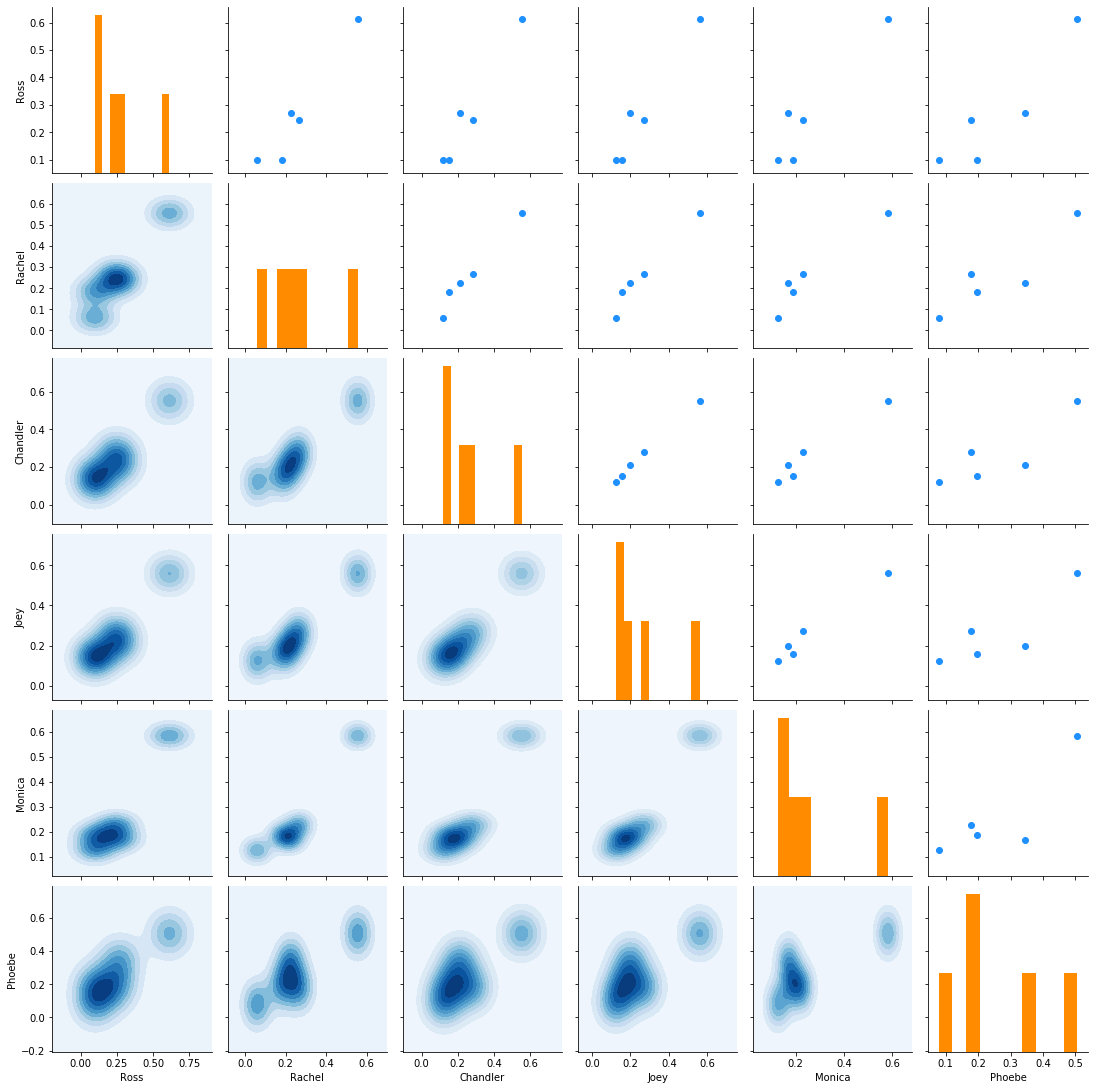

In [367]:
g = sns.PairGrid(df)
g.map_diag(plt.hist,color='darkorange')
g.map_upper(plt.scatter,color='dodgerblue')
g.map_lower(sns.kdeplot,cmap='Blues',shade=True)

g.savefig('character_emotion_corr.png')

In [26]:
# Concatenate Images

import sys
from PIL import Image
import math

images = [Image.open(x) for x in ['Sentiment Analysis/ross_emotion_pie.png','Sentiment Analysis/rachel_emotion_pie.png',
                                  'Sentiment Analysis/chandler_emotion_pie.png','Sentiment Analysis/joey_emotion_pie.png',
                                  'Sentiment Analysis/monica_emotion_pie.png','Sentiment Analysis/phoebe_emotion_pie.png']]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (math.ceil(total_width/2), max_height*2))

new_im.paste(images[0],(0,0))
new_im.paste(images[1],(im.size[0],0))
new_im.paste(images[2],(2*im.size[0],0))
new_im.paste(images[3],(0,y_offset+im.size[1]))
new_im.paste(images[4],(im.size[0],y_offset+im.size[1]))
new_im.paste(images[5],(2*im.size[0],y_offset+im.size[1]))

new_im.save('emotion_pie_combined.png')

In [45]:
images = [Image.open(x) for x in ['Sentiment Analysis/sadness_quotient_all.png','Sentiment Analysis/joy_quotient_all.png',
                                  'Sentiment Analysis/fear_quotient_all.png','Sentiment Analysis/disgust_quotient_all.png',
                                  'Sentiment Analysis/anger_quotient_all.png']]
width = images[0].size[0]
height = images[0].size[1]

total_width = width*3
total_height = height*2

new_im = Image.new('RGB', (total_width, total_height), color='white')

new_im.paste(images[0],(0,0))
new_im.paste(images[1],(width,0))
new_im.paste(images[2],(2*width,0))
new_im.paste(images[3],(math.ceil(width/2),height))
new_im.paste(images[4],(width+math.ceil(width/2), height))

new_im.save('all_emotion_quotient_combined.png')